# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
sns.set_theme(style="ticks")
warnings.filterwarnings('ignore')

# import dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Sebercheres/UTS-DL/main/dataset/creditcard.csv')

# EDA

In [3]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,0
4,NaN,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,0


In [4]:
df.dtypes

V1       float64
V2       float64
V3       float64
V4       float64
V5       float64
V6       float64
V7       float64
V8       float64
V9       float64
V10      float64
Class      int64
dtype: object

> the features are all numberical with the target of the data is named Class

> as the features doesnt have a real meaning to it i cannot perform feature engineering

In [5]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Class
count,284802.000000,2.848030e+05,284801.000000,284800.000000,284801.000000,284802.000000,284802.000000,284801.000000,284799.000000,284802.000000,284807.000000
mean,0.000013,7.430608e-07,-0.000028,-0.000011,0.000002,-0.000007,-0.000003,-0.000011,-0.000003,-0.000008,0.001727
std,1.958699,1.651318e+00,1.516254,1.415866,1.380261,1.332276,1.237102,1.194359,1.098643,1.088855,0.041527
min,-56.407510,-7.271573e+01,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,0.000000
25%,-0.920356,-5.985499e-01,-0.890375,-0.848639,-0.691604,-0.768296,-0.554080,-0.208633,-0.643108,-0.535436,0.000000
50%,0.018110,6.546722e-02,0.179832,-0.019848,-0.054332,-0.274204,0.040088,0.022356,-0.051429,-0.092926,0.000000
75%,1.315645,8.037342e-01,1.027167,0.743328,0.611927,0.398558,0.570441,0.327346,0.597152,0.453898,0.000000
max,2.454930,2.205773e+01,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,1.000000


> the range of the data is also variate so we need to do some scaling before we fit it into the model

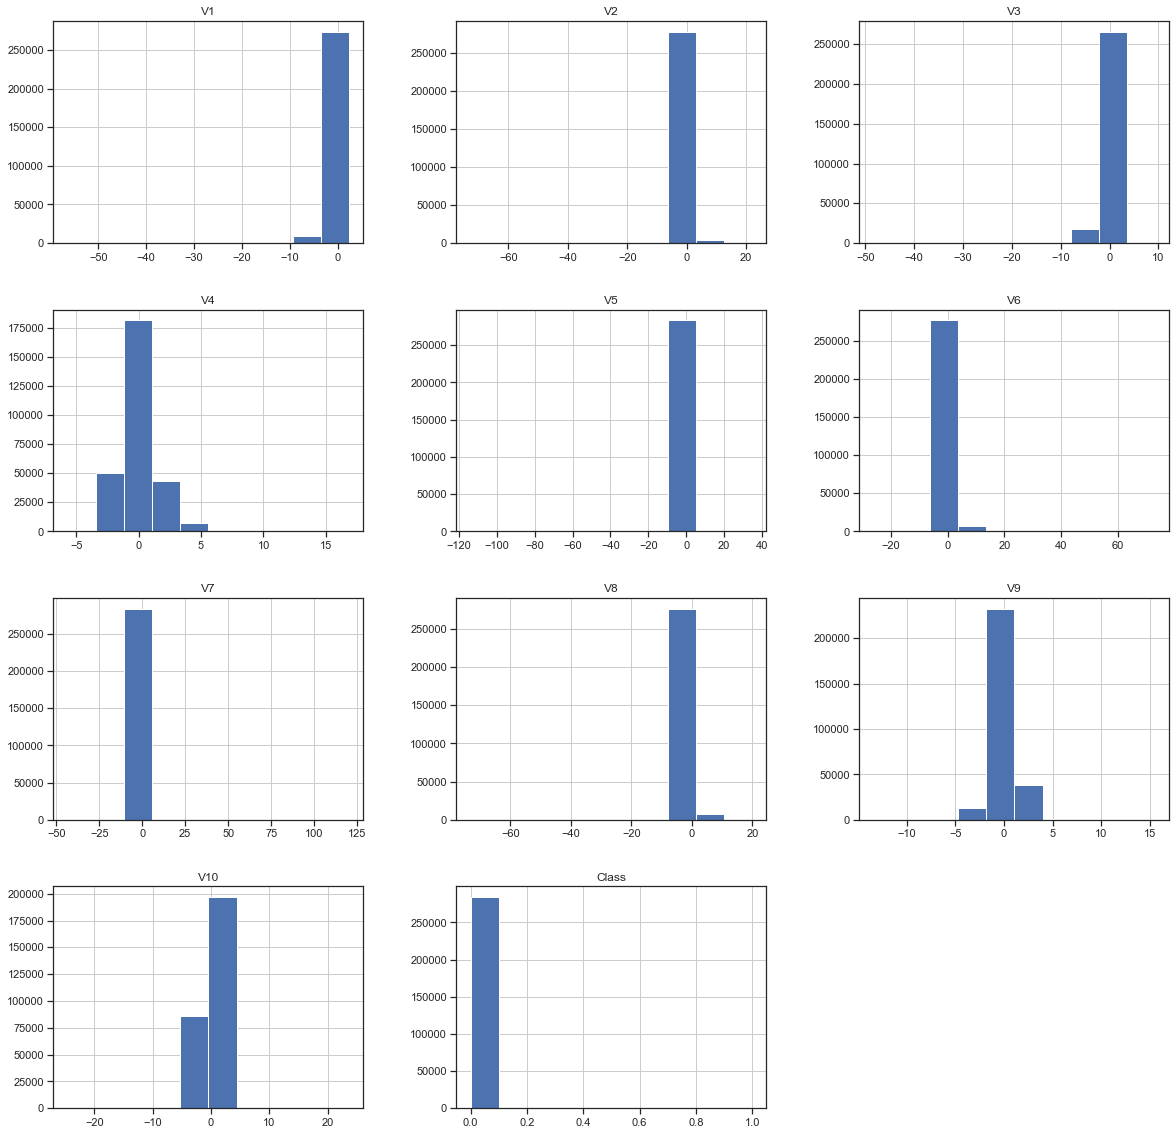

In [6]:
df.hist(figsize=(20,20))
plt.show()

> because of the lack of feature names i cannot tell any insight of the data as we see that some of the columns are skewed so we can use cube root transformation. if i know the feature names maybe some of them i will not transform it.

## Nan Values

> now we need to check for nan values in the data

> is there a data that has more than 20% of it is missing values

In [7]:
df.loc[:,((df.isna().sum()/len(df)) > .20)].isna().sum().sort_values(ascending=False).any()

False

In [8]:
df.isna().sum()

V1       5
V2       4
V3       6
V4       7
V5       6
V6       5
V7       5
V8       6
V9       8
V10      5
Class    0
dtype: int64

> the following columns that has some missing values as the data point is little i'll just replace it with its median

## Correlation

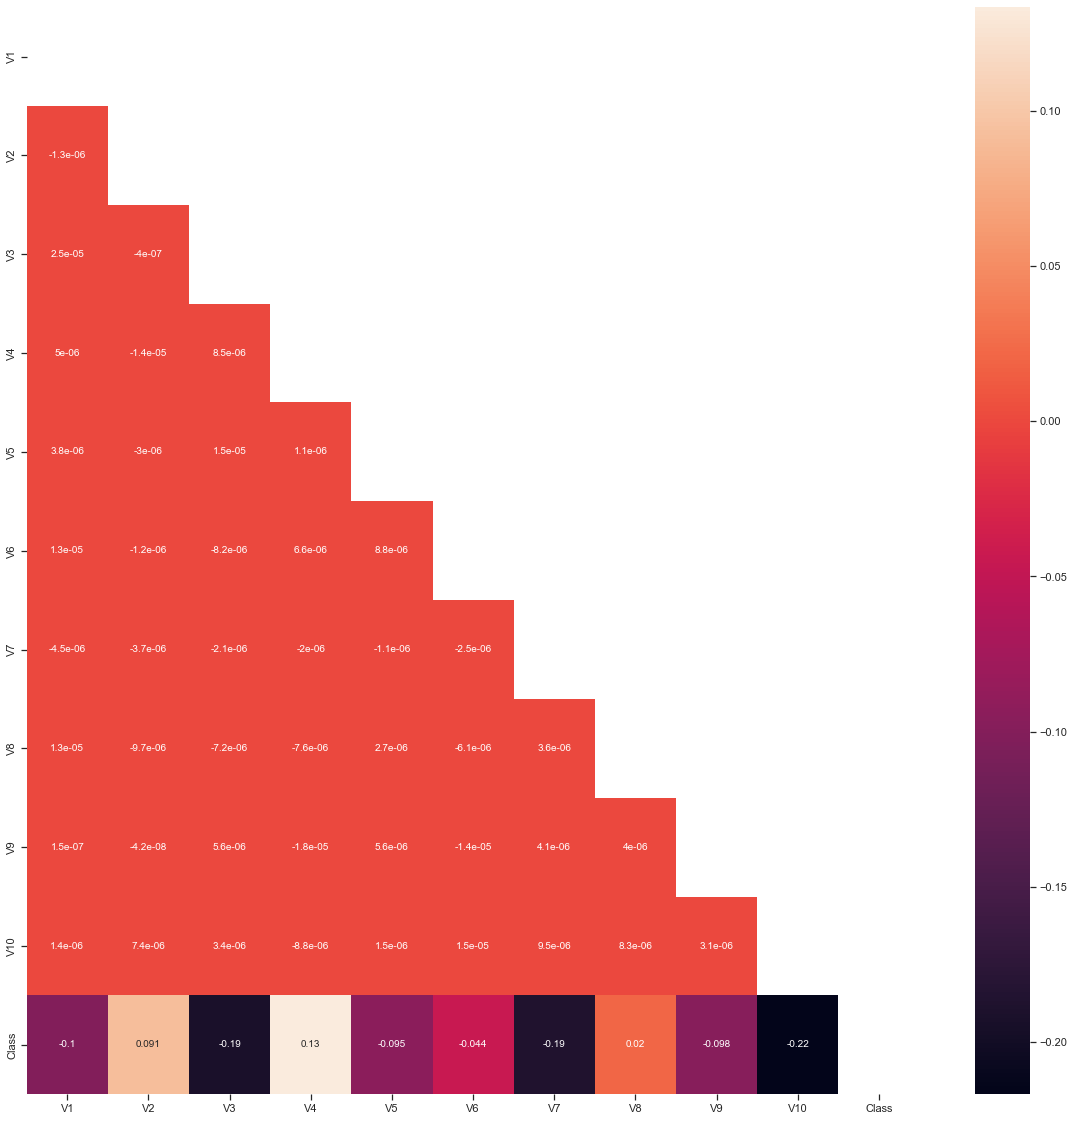

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, mask=np.triu(df.corr()))
plt.show()

> we can see that the features arent really correalate with each others with V10 with the highset correlation with the target.

> in here we dont need to drop any columns because of the low correlation between features

> as it will take a lot of time im going to take just a sample to see their correlation using pairplot

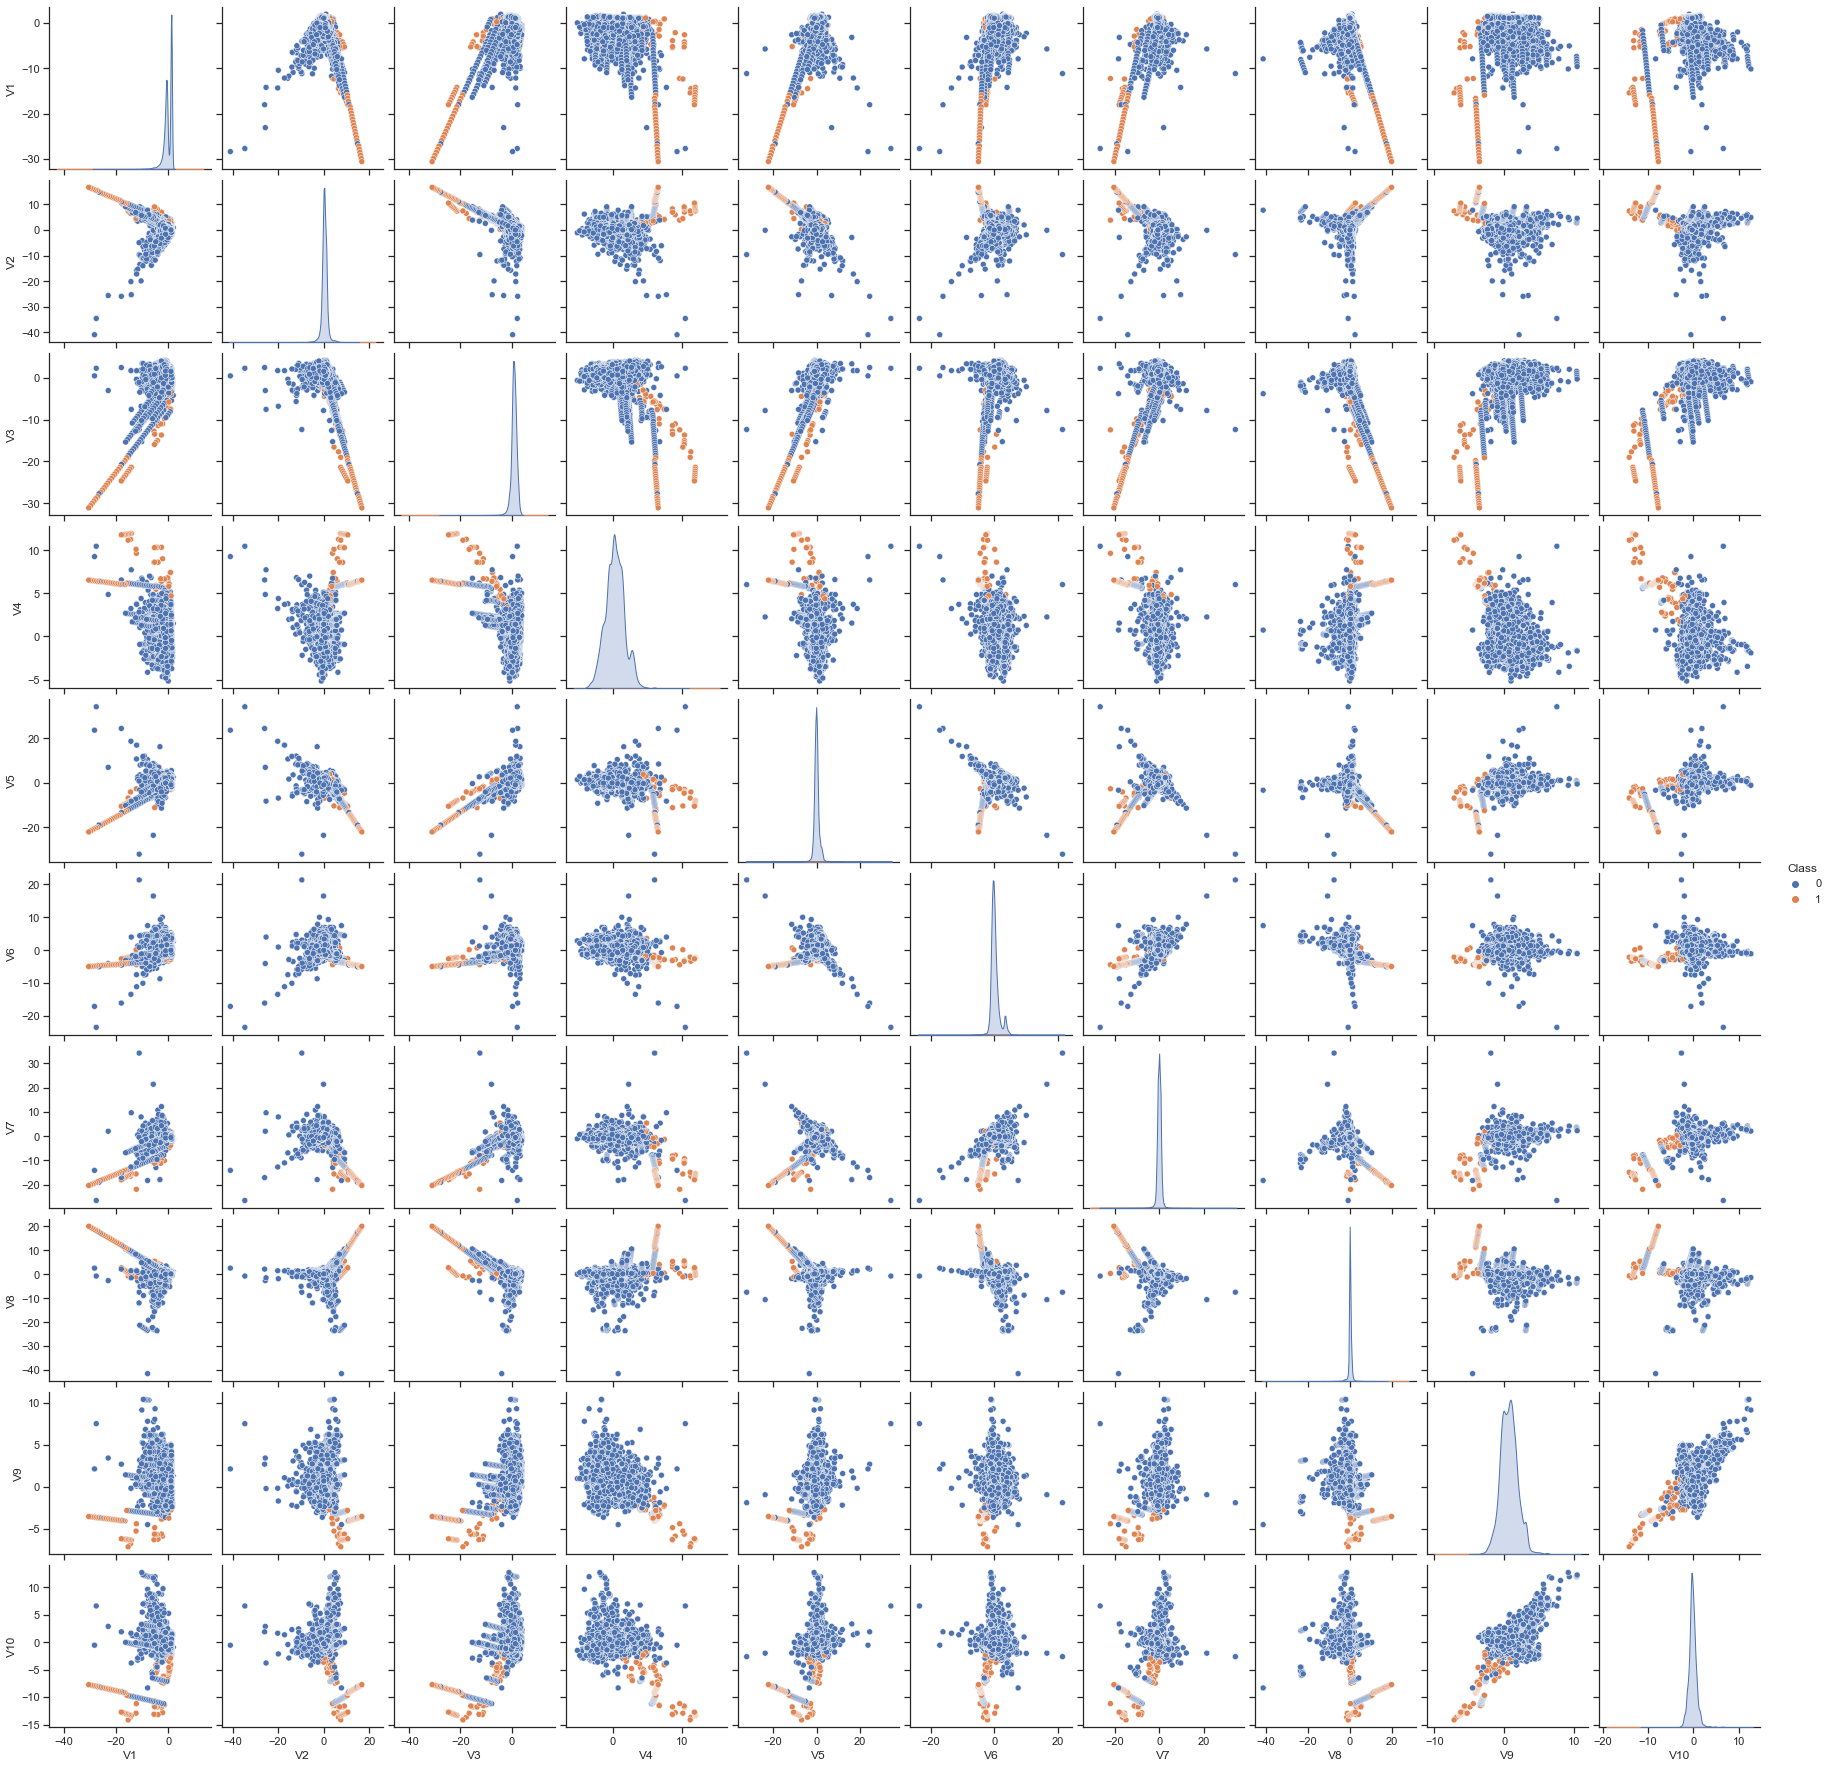

In [10]:
sns.pairplot(df[:20000], hue='Class')
plt.show()

> from the pairplot we can see that the class is clearly separable using all the features

## imbalance

In [18]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

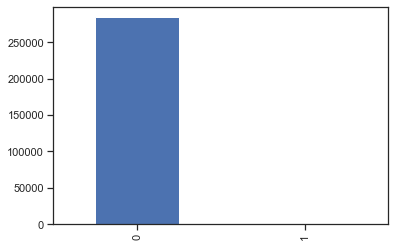

In [20]:
df.Class.value_counts().plot(kind='bar')
plt.show()

> im oversampling not so much as the data that will be found in real life will also the same but if we just let all the data to be trained with the model it will be bias and just predict everything as 0.

> we need to deal with it so we can oversample the data 0 to be about 20000 so that the real world data still have some impact on the data which is imbalance.

## outliar

In [24]:
cols = df.columns.tolist()[:-1]

In [25]:
cols

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']

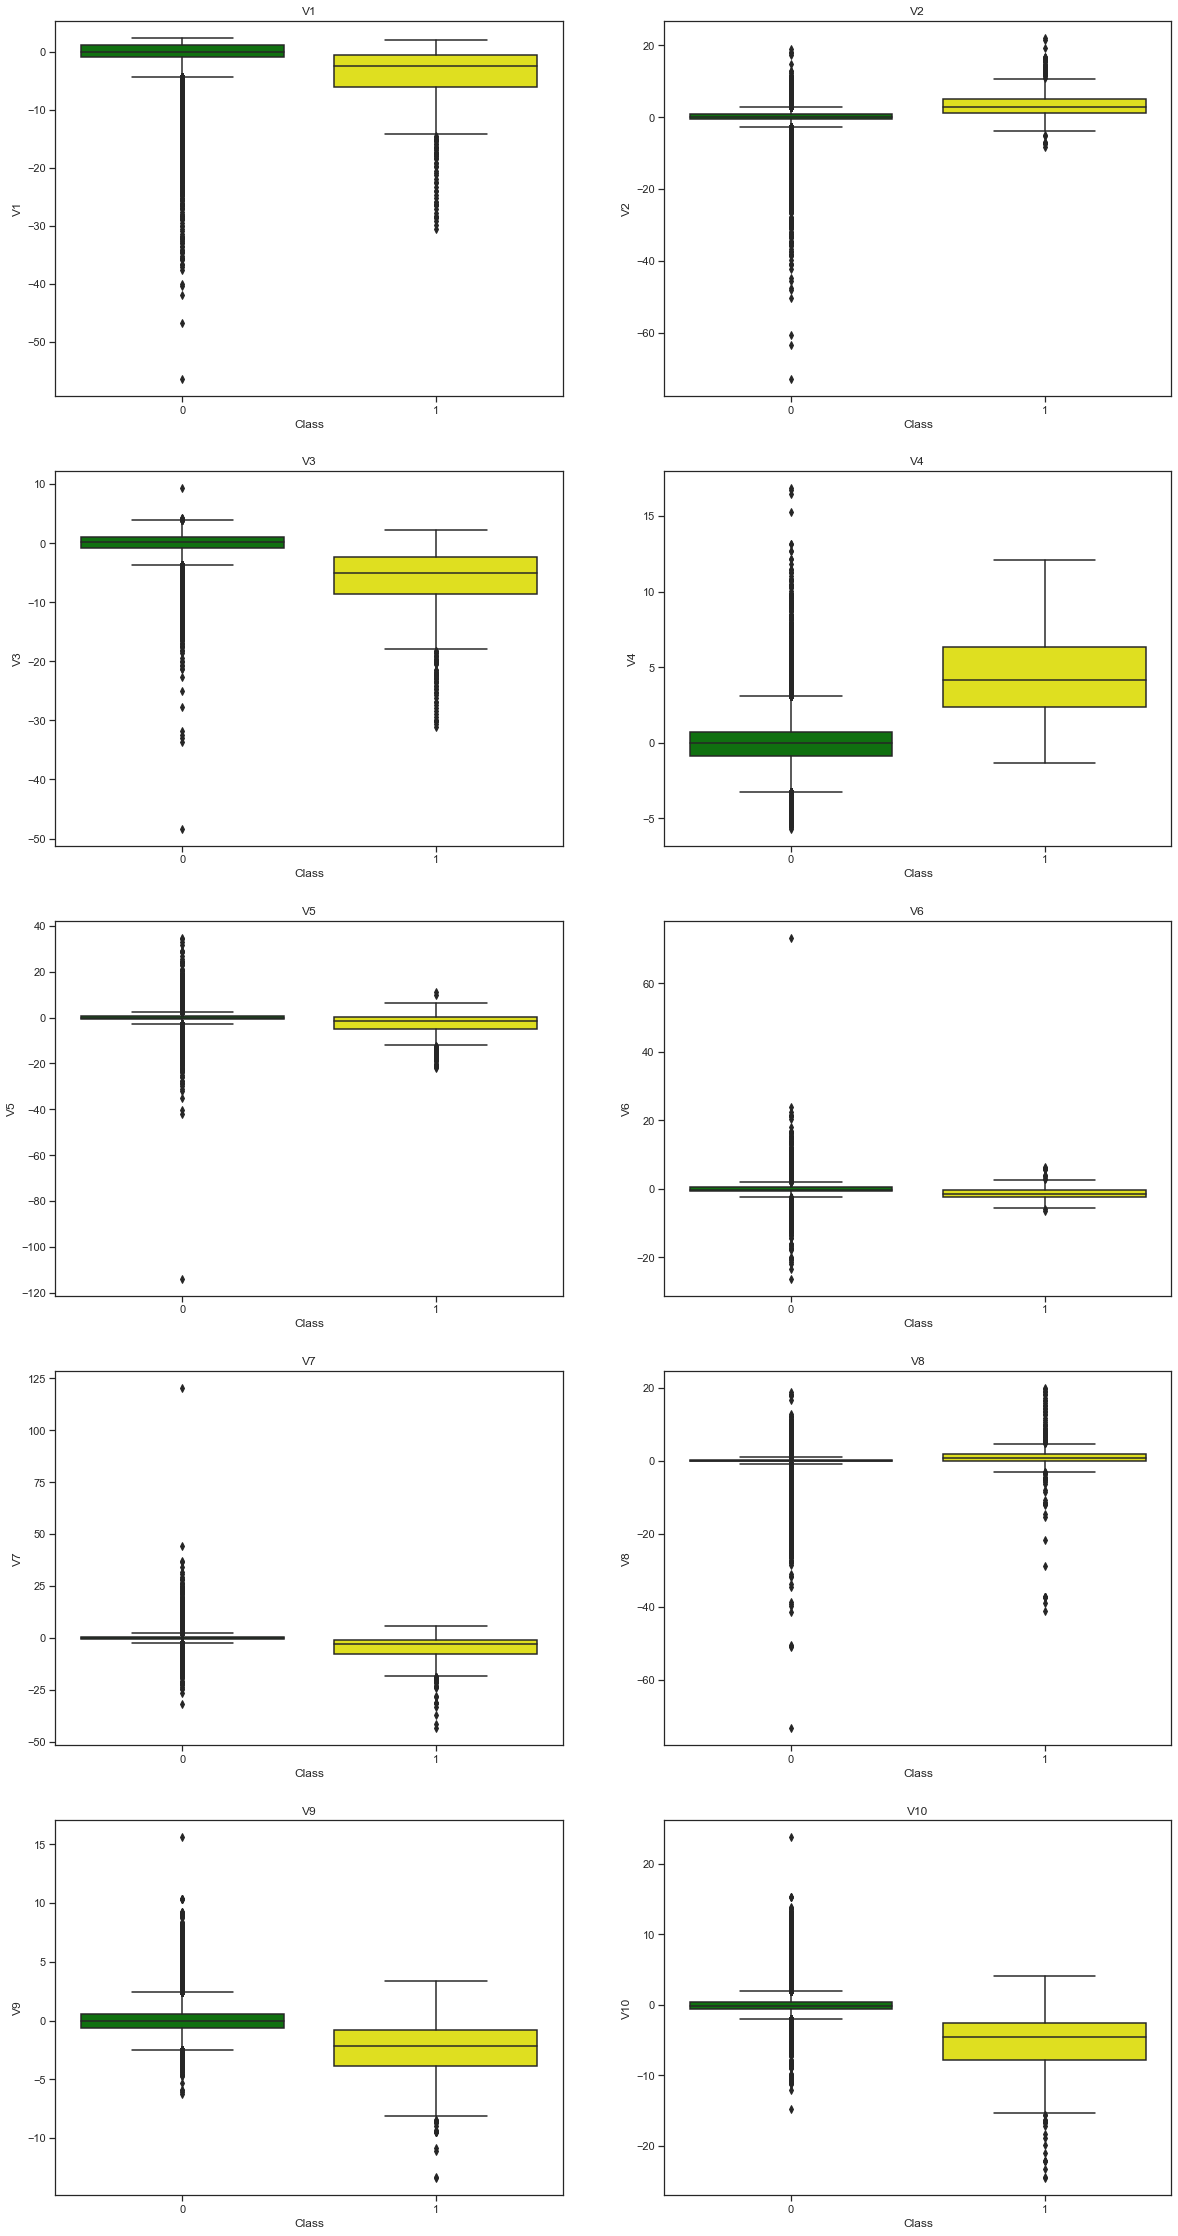

In [31]:
colors = ['green','yellow']
f, axes = plt.subplots(nrows=5,ncols=2, figsize=(20,40))
idx = 0
for i in range(5):
    for j in range(2):
        loc = (i*2)+j
        sns.boxplot(x="Class", y=cols[loc], data=df[df[cols[loc]]!=0], palette=colors, ax=axes[i][j])
        axes[i][j].set_title(cols[loc])


plt.show()

> as we can see there are a lot of outliars how i handle this will be as followed the outliar that is more than the max of the boxplot will be replaced with the max and also the min will also followed as well.

# conclusion

> there is a lot to do from the EDA above such as:

- we need to deal with skewed data im going to use cube root tranformation
- dealing with nan values because of little data point that is missing i will use its median to impute it
- as there is little correlation between features we do need to drop any columns and dont need to do feature engineering
- as the target data is imbalance im going to oversample it but within the range so that the data doesnt exceed the real world data.
- dealing with outliar im going to replace them with max and min of the boxplot